# Домашнее задание 1 (номер 1) (Паровые и газовые турбины)

# Выполнил Салабай В.Р. (ФПэ-01-22)

In [1]:
#Загружаем библиотеки
import matplotlib.pyplot as plt 
import numpy as np  
import iapws  
from iapws import IAPWS97 as gas

""""Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:
𝑃0 = 5 МПа, 𝑡0 = 450 градусов Цельсия, 𝑃𝑘 = 5, 10, 15, 20, 50 кПа. 
Принять давление за последней ступенью паровой турбины 𝑃2 = 𝑃𝑘. 
Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе."""

In [2]:
#CИ
MPa = 10**6 
kPa = 10**3 
unit = 1 / MPa 
gradus_Celsiya = 1 

In [3]:
#Массивы температуры и давления соответсвенно 
t0 = np.array([300, 350, 400, 450 ,500])
p0 = np.array([5, 10 , 15 , 20])
pk = 5 * kPa 

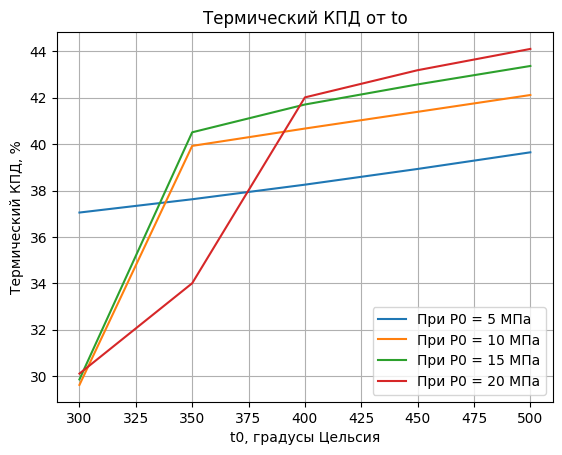

In [4]:
#Используя формулы, производим расчеты
for P0 in p0: 
    KPD = [] 
    for T0 in t0: 
        point_0 = gas(P = P0, T = (T0 + 273.15))  
        point_condensator_vhod = gas (P = (pk * unit) , s=point_0.s) 
        point_nasos_vihod = gas (P = (pk * unit), x=0) 
        poleznaya_energiya = point_0.h - point_condensator_vhod.h 
        polnaya_energiya = point_0.h - point_nasos_vihod.h 
        KPD_1 = (poleznaya_energiya / polnaya_energiya)*100 
        KPD.append(KPD_1)

    #Построим график зависимости
    
    plt.title("Термический КПД от to") 
    plt.ylabel("Термический КПД, %")
    plt.xlabel("t0, градусы Цельсия") 
    plt.plot(t0[:5], KPD[:5], label=f"При P0 = {P0} МПа") 
    
    
plt.grid() 
plt.legend();
        
        
        